## Capstone Project - Predicting content quality and popularity for streaming services

by Arjun Lokur

### Part 1 : Cleaning, EDA and Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the data for Netflix first, with the titles and the credits (meaning the actors and director) being in seperate csv files

netflix_titles = pd.read_csv('data/netflix_titles.csv')

In [3]:
netflix_titles['platform'] = 'netflix'

In [4]:
netflix_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,netflix
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,netflix
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,netflix
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,netflix
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,netflix


In [5]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
 15  platform             

I'm going to combine all the streaming titles into one csv file before cleaning it.

In [6]:
#now importing the credits for netflix

netflix_credits = pd.read_csv('data/netflix_credits.csv')

In [7]:
netflix_credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


We can see that this file has the entire cast for a movie/tv show on Netflix. We can join these tables as they both share a column 'id' which is a unique identifier for a given piece of content. For example, the id 'tm84618' refers to the movie Taxi Driver.

In [8]:
#netflix = pd.merge(netflix_titles, netflix_credits)

In [9]:
#netflix.info()

In [10]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
 15  platform             

In [11]:
#netflix.head()

In [12]:
#Checking who the top actors/directors are on Netflix by number of movies

netflix_credits.groupby(netflix_credits['name'])["id"].count().sort_values(ascending=False).reset_index().head()

,name,id
0,Boman Irani,25
1,Kareena Kapoor Khan,25
2,Shah Rukh Khan,23
3,Takahiro Sakurai,21
4,Raúl Campos,20


In [13]:
#Now creating the dataframes for all the other streaming sevices one by one
#First up HBOmax

hbo_titles = pd.read_csv('data/hbo_titles.csv')
hbo_credits = pd.read_csv('data/hbo_credits.csv')
hbo_titles['platform'] = 'hbo'
#hbo = pd.merge(hbo_titles, hbo_credits)

In [14]:
#Disneyplus
disney_titles = pd.read_csv('data/disney_titles.csv')
disney_credits = pd.read_csv('data/disney_credits.csv')
disney_titles['platform'] = 'disney'
#disney = pd.merge(disney_titles, disney_credits)

In [15]:
#Amazon Prime video
prime_titles = pd.read_csv('data/prime_titles.csv')
prime_credits = pd.read_csv('data/prime_credits.csv')
prime_titles['platform'] = 'prime'
#prime = pd.merge(prime_titles, prime_credits)

In [16]:
#Combining all the titles into one dataframe, and all the credits into one dataframe

all_titles = pd.concat([netflix_titles,hbo_titles,disney_titles,prime_titles])

all_credits = pd.concat([netflix_credits,hbo_credits,disney_credits,prime_credits])

In [17]:
#Checking for the null values in ther titles dataframe

all_titles.isna().sum()/len(all_titles) * 100

id                       0.000000
title                    0.004866
type                     0.000000
description              0.754258
release_year             0.000000
age_certification       51.771290
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 77.450122
imdb_id                  8.749392
imdb_score              11.201946
imdb_votes              11.396594
tmdb_popularity          3.318735
tmdb_score              13.479319
platform                 0.000000
dtype: float64

In [18]:
temp = pd.DataFrame()

In [19]:
#temp = streaming[streaming['role'] == 'DIRECTOR']

#streaming.groupby(['name','role'])["id"].count().sort_values(ascending=False).reset_index().head()

#df.loc[df['Age'] >= 18]

In [20]:
#This code assigns a rank to the cast in the order in which they appear in the listing for each movie-role combo.
#Meaning the Taxi Driver - Actor is one combo (De Niro is first) and then Taxi Driver - Director is another combo...
#(Scorsese is first)

all_credits['rank'] = (all_credits.groupby(['id','role']).cumcount()+1)

#streaming.groupby("title")['role'].rank(method='first', ascending=True).reset_index().head(50)
#df.groupby("C1")["C2"].rank(method="first", ascending=True)

In [21]:

all_credits.groupby('name').agg({'rank':'mean', 
                         'id':'count'})

#streaming.groupby(['name','role'])['rank'].mean().sort_values(ascending=True).reset_index().head(50)
#df.groupby("Group").agg({"Value1": "mean", "Value2": "mean"}).sort_values(by=[("Value1", "desc"), ("Value2", "asc")])

,rank,id
name,,
Michael Hayden,7.0,1
Nelson Venkatesan,1.0,2
"""Daddy"" Gene Jackson",18.0,1
"""Kobra"" Devoux",13.0,1
"""Mama"" Ruth Jackson",17.0,1
...,...,...
정지환,13.0,1
주둥닝,1.0,1
지뢰,1.0,1


In [22]:
#Putting the rank in all_credits

all_credits['rank'] = (all_credits.groupby(['id','role']).cumcount()+1)

In [23]:
all_credits.head()

,person_id,id,name,character,role,rank
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,1
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR,2
2,7064,tm84618,Albert Brooks,Tom,ACTOR,3
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,4
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR,5


In [24]:
#function to return the mean without outliers


def mean_without_outliers(data, multiplier=1.5):
    """
    Calculates the mean of a pandas Series after removing outliers.

    Args:
        data (pandas.Series): A pandas Series of numerical data.
        multiplier (float): A multiplier used to adjust the strictness of outlier identification. Default is 1.5.

    Returns:
        float: The mean of the data after removing outliers.

    Raises:
        TypeError: If the data input is not a pandas Series.
        ValueError: If the data input is empty.
    """

    if not isinstance(data, pd.Series):
        raise TypeError("Data must be a pandas Series.")
    if data.empty:
        raise ValueError("Data Series cannot be empty.")
    
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data.mean()




In [25]:
#Trying to find a methodology to give a score to every actor
#Current code is finding the mode for each actor's rank. Mode instead of mean because outlier ranks are...
#skewing the means.


#result_mode = all_credits.groupby('name').agg({'rank': lambda x: x.mode()}).reset_index()

#all_credits[all_credits['name']=='Tom Hanks'].groupby('name').agg({'rank':'mean', 'id':'count'})

#mosquito.groupby(mosquito['Month'])["Mosquito number"].sum().reset_index()

In [26]:
#Trying the same as the above but with the no-outlier mean instead of the mode

#multiplier = 1.5
#mean_without_outliers = lambda s: s[(s >= np.quantile(s, 0.25) - multiplier * (np.quantile(s, 0.75) - np.quantile(s, 0.25))) & 
                                    #(s <= np.quantile(s, 0.75) + multiplier * (np.quantile(s, 0.75) - np.quantile(s, 0.25)))].mean()

#result = all_credits.groupby('name')['rank'].apply(mean_without_outliers)

#all_credits.groupby('name').agg({'rank': lambda x: x.mean_without_outliers()})

In [27]:
#Modifying the no-outlier mean to make it a bit tighter

#multiplier = 1.2
#mean_without_outliers = lambda s: s[(s >= np.quantile(s, 0.25) - multiplier * (np.quantile(s, 0.75) - np.quantile(s, 0.25))) & 
                                    #(s <= np.quantile(s, 0.75) + multiplier * (np.quantile(s, 0.75) - np.quantile(s, 0.25)))].mean()

#result2 = all_credits.groupby('name')['rank'].apply(mean_without_outliers)


In [28]:
#result2 = result2.reset_index()

In [29]:
#result2[result2['name'] == 'Tom Hanks']

In [30]:
#Even tighter

#multiplier = 0.5
#mean_without_outliers = lambda s: s[(s >= np.quantile(s, 0.25) - multiplier * (np.quantile(s, 0.75) - np.quantile(s, 0.25))) & 
                                    #(s <= np.quantile(s, 0.75) + multiplier * (np.quantile(s, 0.75) - np.quantile(s, 0.25)))].mean()

#result3 = all_credits.groupby('name')['rank'].apply(mean_without_outliers)


In [31]:
#result3 = result3.reset_index()

In [32]:
#result3[result3['name'] == 'Tom Cruise']

In [33]:
#Even tighter

multiplier = 0.1
mean_without_outliers = lambda s: s[(s >= np.quantile(s, 0.25) - multiplier * (np.quantile(s, 0.75) - np.quantile(s, 0.25))) & 
                                    (s <= np.quantile(s, 0.75) + multiplier * (np.quantile(s, 0.75) - np.quantile(s, 0.25)))].mean()

result4 = all_credits.groupby('name')['rank'].apply(mean_without_outliers).reset_index()


In [34]:
result4[result4['name'] == 'Robert Downey Jr.']

,name,rank
121531,Robert Downey Jr.,1.869565


In [35]:
result4 = result4.rename(columns={'rank':'mean_rank_without_outliers'})

In [36]:
merged_df = pd.merge(all_credits, result4, on='name', how='outer')

In [37]:
merged_df.isna().sum()

person_id                         0
id                                0
name                              0
character                     32207
role                              0
rank                              0
mean_rank_without_outliers    41526
dtype: int64

In [38]:
all_credits

,person_id,id,name,character,role,rank
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,1
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR,2
2,7064,tm84618,Albert Brooks,Tom,ACTOR,3
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,4
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR,5
...,...,...,...,...,...,...
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR,1
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR,2
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR,3
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR,4


In [39]:
len(all_credits)

294841

In [40]:
all_credits[all_credits['name'] == 'Vishwa Bhanu']

,person_id,id,name,character,role,rank
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR,4
124234,1938620,tm1054116,Vishwa Bhanu,NaN,DIRECTOR,1


In [41]:
merged_df['mean_rank_without_outliers'] = merged_df['mean_rank_without_outliers'].fillna(merged_df.pop('rank'))

#df['Temp_Rating'] = df['Temp_Rating'].fillna(df.pop('Farheit'))

In [42]:
merged_df

,person_id,id,name,character,role,mean_rank_without_outliers
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,1.772727
1,3748,tm155787,Robert De Niro,James Conway,ACTOR,1.772727
2,3748,tm180542,Robert De Niro,David 'Noodles' Aaronson,ACTOR,1.772727
3,3748,tm145608,Robert De Niro,Leonard Lowe,ACTOR,1.772727
4,3748,tm311902,Robert De Niro,Himself (Uncredited),ACTOR,1.772727
...,...,...,...,...,...,...
294836,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR,1.000000
294837,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR,2.000000
294838,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR,3.000000
294839,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR,4.000000


In [43]:
all_credits_new = merged_df

In [44]:
all_credits_new

,person_id,id,name,character,role,mean_rank_without_outliers
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,1.772727
1,3748,tm155787,Robert De Niro,James Conway,ACTOR,1.772727
2,3748,tm180542,Robert De Niro,David 'Noodles' Aaronson,ACTOR,1.772727
3,3748,tm145608,Robert De Niro,Leonard Lowe,ACTOR,1.772727
4,3748,tm311902,Robert De Niro,Himself (Uncredited),ACTOR,1.772727
...,...,...,...,...,...,...
294836,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR,1.000000
294837,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR,2.000000
294838,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR,3.000000
294839,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR,4.000000


In [45]:
title_count = all_credits_new.groupby('name')['id'].count().reset_index()

In [46]:
title_count.rename(columns={'id':'count_of_titles'}, inplace=True)

In [47]:
merged_df = pd.merge(all_credits_new, title_count, on = 'name')

In [48]:
merged_df.sort_values(by='id')

,person_id,id,name,character,role,mean_rank_without_outliers,count_of_titles
210505,2093,tm1,Pam Rose,Leesub Sirln (uncredited),ACTOR,81.000000,1
210451,2041,tm1,Ted Burnett,Wuher (uncredited),ACTOR,35.000000,1
210452,2040,tm1,John Chapman,Drifter (Red 12) (uncredited),ACTOR,36.000000,1
210453,2042,tm1,Gilda Cohen,Cantina Patron (uncredited),ACTOR,37.000000,1
210454,2043,tm1,Tim Condren,Stormtrooper (uncredited),ACTOR,38.000000,1
...,...,...,...,...,...,...,...
7290,828,ts9926,John C. Reilly,Dr. Steve Brule,ACTOR,4.230769,23
183255,5368,ts9926,Tim Heidecker,NaN,DIRECTOR,2.600000,17
31490,24626,ts9986,Chris Elliott,Chris Monsanto,ACTOR,11.166667,8
196702,80498,ts9986,Maria Thayer,Susie Wagner,ACTOR,2.000000,2


In [49]:
merged_df['value'] = merged_df['count_of_titles']/(merged_df['mean_rank_without_outliers'])

In [50]:
list_of_values = merged_df[merged_df['role'] == 'ACTOR'].groupby(['name','role'])['value'].max().reset_index().sort_values(by='value',ascending=False)

In [51]:
list_of_values.describe()

,value
count,144178.000000
mean,0.368194
std,0.926339
min,0.003195
25%,0.048780
50%,0.111111
75%,0.333333
max,46.000000


In [52]:
list_of_values[list_of_values['value'] >= 15].count()

name     68
role     68
value    68
dtype: int64

In [53]:
list_of_values[list_of_values['value'] >= 10].count()

name     215
role     215
value    215
dtype: int64

In [54]:
list_of_values[list_of_values['value'] >= 5].count()

name     940
role     940
value    940
dtype: int64

In [55]:
list_of_values[list_of_values['value'] == 5].head(50)

,name,role,value
129944,Tab Hunter,ACTOR,5.0
130159,Takashi Miike,ACTOR,5.0
129512,Swapnil Joshi,ACTOR,5.0
2635,Alan C. Lim,ACTOR,5.0
60128,Jason London,ACTOR,5.0
55771,Isao Takahata,ACTOR,5.0
134564,Tommy Wirkola,ACTOR,5.0
112414,Remo D'Souza,ACTOR,5.0
7970,Andy Wisher,ACTOR,5.0
103633,Olivia Rodrigo,ACTOR,5.0


In [56]:
import seaborn as sns

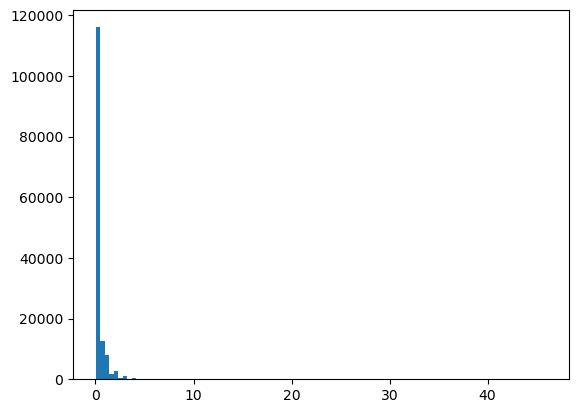

In [57]:
plt.hist(list_of_values['value'], bins = 100)
plt.show()

In [58]:
all_titles[all_titles['id'] == 'tm100001']

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
319,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,NaN,61,"['western', 'action', 'romance']",['US'],NaN,tt0025440,5.6,1213.0,4.079,4.7,prime


In [59]:
#Need to figure out how to deal with the director column correctly

merged_df.loc[merged_df['role'] == 'DIRECTOR', 'value'] = 0

In [60]:
def get_actor_count(value):
    if value >= 15:
        return 'Superstars'
    elif 10 <= value < 15:
        return 'Allstars'
    elif 5 <= value < 10:
        return 'Supporting'
    elif 0 < value < 5:
        return 'Other'
    else:
        return 'None'

merged_df['Superstars'] = merged_df['value'].apply(lambda x: get_actor_count(x) == 'Superstars')
merged_df['Allstars'] = merged_df['value'].apply(lambda x: get_actor_count(x) == 'Allstars')
merged_df['Supporting'] = merged_df['value'].apply(lambda x: get_actor_count(x)=='Supporting')
merged_df['Other'] = merged_df['value'].apply(lambda x: get_actor_count(x)=='Other')

grouped_df = merged_df.groupby('id').agg({'Superstars' : 'sum', 'Allstars' : 'sum', 'Supporting' : 'sum', 'Other' : 'sum'}).reset_index()


In [61]:
grouped_df.sort_values(by = 'Superstars', ascending=False).head(10)

,id,Superstars,Allstars,Supporting,Other
11516,tm68190,5,4,7,40
7444,tm32643,4,3,16,108
3036,tm144345,4,2,0,46
11750,tm73058,4,5,8,49
6710,tm27911,4,4,4,140
5920,tm236637,3,2,3,6
1943,tm11948,3,0,1,38
11427,tm67239,3,0,1,1
12078,tm8026,3,0,0,0
12015,tm79216,3,0,7,30


In [62]:
grouped_df.to_csv('data/actor_bins_by_title.csv')

In [63]:
merged_df[merged_df['id'] == 'tm236637']

,person_id,id,name,character,role,mean_rank_without_outliers,count_of_titles,value,Superstars,Allstars,Supporting,Other
7774,2718,tm236637,Tom Hanks,NaN,ACTOR,1.656250,42,25.358491,True,False,False,False
19151,3464,tm236637,Alec Baldwin,NaN,ACTOR,3.000000,26,8.666667,False,False,True,False
19813,2779,tm236637,Steven Spielberg,NaN,ACTOR,1.529412,23,15.038462,True,False,False,False
32116,12424,tm236637,James L. Brooks,NaN,ACTOR,4.333333,4,0.923077,False,False,False,True
36845,16606,tm236637,Matthew Broderick,NaN,ACTOR,2.714286,15,5.526316,False,False,True,False
37440,22796,tm236637,Nathan Lane,NaN,ACTOR,5.090909,19,3.732143,False,False,False,True
48234,7737,tm236637,Dustin Hoffman,NaN,ACTOR,1.812500,21,11.586207,False,True,False,False
50376,9059,tm236637,Frank Langella,NaN,ACTOR,4.571429,14,3.062500,False,False,False,True
52170,28334,tm236637,Mike Nichols,NaN,ACTOR,1.000000,10,10.000000,False,True,False,False
57401,6716,tm236637,Meryl Streep,NaN,ACTOR,1.708333,32,18.731707,True,False,False,False


In [64]:
all_titles[all_titles['title'] == 'Mike Nichols: An American Master']

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
2231,tm236637,Mike Nichols: An American Master,MOVIE,"With charm and wit, Nichols discusses his life...",2016,NaN,56,['documentation'],['US'],NaN,NaN,NaN,NaN,1.469,6.2,hbo


In [65]:
all_credits.iloc[36:60]

,person_id,id,name,character,role,rank
36,3308,tm84618,Martin Scorsese,NaN,DIRECTOR,1
37,10103,tm154986,Jon Voight,Ed Gentry,ACTOR,1
38,13020,tm154986,Burt Reynolds,Lewis Medlock,ACTOR,2
39,6639,tm154986,Ned Beatty,Bobby Trippe,ACTOR,3
40,11224,tm154986,Ronny Cox,Drew Ballinger,ACTOR,4
41,24509,tm154986,Ed Ramey,Old Man at the Gas-Station,ACTOR,5
42,80069,tm154986,Billy Redden,Lonnie - The Banjo Boy,ACTOR,6
43,84032,tm154986,Seamon Glass,First Griner,ACTOR,7
44,84031,tm154986,Randall Deal,Second Griner,ACTOR,8
45,7918,tm154986,Bill McKinney,Mountain Man,ACTOR,9


In [66]:
all_credits[all_credits['name']=='Tom Hanks']

,person_id,id,name,character,role,rank
1876,2718,tm122434,Tom Hanks,Forrest Gump,ACTOR,1
2588,2718,tm56574,Tom Hanks,Joe Fox,ACTOR,1
4638,2718,tm111828,Tom Hanks,Carl Hanratty,ACTOR,2
5325,2718,tm89677,Tom Hanks,Viktor Navorski,ACTOR,1
5418,2718,tm105329,Tom Hanks,Michael Sullivan,ACTOR,1
14682,2718,tm53625,Tom Hanks,Himself,ACTOR,3
34755,2718,tm427465,Tom Hanks,Self,ACTOR,3
49936,2718,tm845437,Tom Hanks,Kip Wilson / Buffy Wilson (archive footage),ACTOR,61
52414,2718,tm981451,Tom Hanks,Self (archive footage),ACTOR,25
65893,2718,tm1195971,Tom Hanks,Self,ACTOR,9


In [67]:
len(all_titles[all_titles['imdb_score'].isnull() & all_titles['imdb_votes'].isnull()])

2302

In [133]:
all_titles.isna().sum()

id                          0
title                       1
type                        0
description               155
release_year                0
age_certification       10639
runtime                     0
genres                      0
production_countries        0
seasons                 15916
imdb_id                  1798
imdb_score               2302
imdb_votes               2342
tmdb_popularity           682
tmdb_score               2770
platform                    0
dtype: int64

In [134]:
#Dropping the rows with null values for imdb score and votes

all_titles.dropna(subset=['imdb_score', 'imdb_votes'], how='all', inplace=True)

<AxesSubplot: >

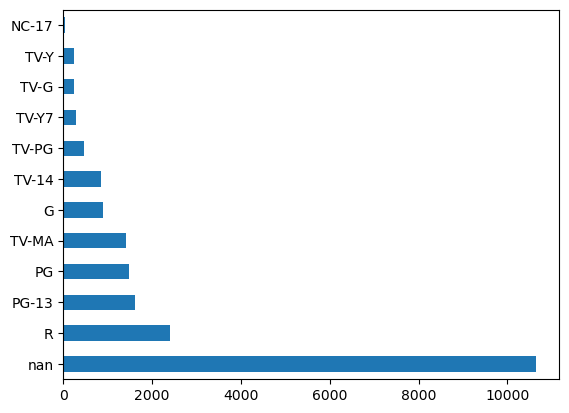

In [69]:
all_titles['age_certification'].value_counts(dropna=False).plot(kind='barh')

In [70]:
all_titles[all_titles['age_certification'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.6,netflix
10,tm44204,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an imp...,1961,NaN,158,"['action', 'drama', 'war']","['GB', 'US']",NaN,tt0054953,7.5,50748.0,13.844,7.3,netflix
13,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,115,"['romance', 'comedy']",['US'],NaN,tt0047673,7.5,42488.0,8.915,7.2,netflix
14,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NaN,77,"['drama', 'crime', 'comedy']",['EG'],NaN,tt0051390,7.5,4471.0,5.546,7.3,netflix
17,tm14350,Alexandria… Why?,MOVIE,Set against the panoramic backdrop of war-torn...,1979,NaN,133,['drama'],['EG'],NaN,tt0077751,7.2,1727.0,1.370,6.0,netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN,prime
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN,prime
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN,prime
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN,prime


In [113]:
all_titles['genres'].value_counts().reset_index()

,index,genres
0,['drama'],1153
1,['comedy'],1124
2,['documentation'],1051
3,"['drama', 'romance']",333
4,"['comedy', 'drama']",318
...,...,...
4049,"['romance', 'war', 'action', 'history', 'europ...",1
4050,"['drama', 'horror', 'scifi']",1
4051,"['family', 'thriller', 'action', 'crime']",1
4052,"['horror', 'comedy', 'romance', 'scifi']",1


In [72]:
all_genre_combos = all_titles['genres'].explode().unique()


In [73]:
all_genre_combos

array(["['documentation']", "['drama', 'crime']",
       "['drama', 'action', 'thriller', 'european']", ...,
       "['drama', 'romance', 'comedy', 'history']",
       "['drama', 'family', 'thriller']",
       "['thriller', 'western', 'comedy']"], dtype=object)

In [74]:
unique_genres = []
for title in all_genre_combos:
    for i in title:
        unique_genres.append(i)

In [75]:
all_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20550 entries, 0 to 9870
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    20550 non-null  object 
 1   title                 20549 non-null  object 
 2   type                  20550 non-null  object 
 3   description           20395 non-null  object 
 4   release_year          20550 non-null  int64  
 5   age_certification     9911 non-null   object 
 6   runtime               20550 non-null  int64  
 7   genres                20550 non-null  object 
 8   production_countries  20550 non-null  object 
 9   seasons               4634 non-null   float64
 10  imdb_id               18752 non-null  object 
 11  imdb_score            18248 non-null  float64
 12  imdb_votes            18208 non-null  float64
 13  tmdb_popularity       19868 non-null  float64
 14  tmdb_score            17780 non-null  float64
 15  platform            

In [180]:
genres = all_titles['genres']

In [175]:
genres

0                                 ['drama', 'crime']
1        ['drama', 'action', 'thriller', 'european']
2                    ['fantasy', 'action', 'comedy']
3                                  ['war', 'action']
4                             ['comedy', 'european']
                            ...                     
18243                                      ['drama']
18244                            ['comedy', 'drama']
18245                                      ['drama']
18246                                      ['drama']
18247                            ['family', 'drama']
Name: genres, Length: 18248, dtype: object

In [181]:
genres = pd.DataFrame(genres)

In [177]:
genres

,genres
0,"['drama', 'crime']"
1,"['drama', 'action', 'thriller', 'european']"
2,"['fantasy', 'action', 'comedy']"
3,"['war', 'action']"
4,"['comedy', 'european']"
...,...
18243,['drama']
18244,"['comedy', 'drama']"
18245,['drama']
18246,['drama']


In [182]:
#Needed to do the next 3 steps one after the other, it wasn't working without that

genres['genres'] = ((genres['genres'].str.replace('[','')).replace(']','')).replace("'",'')

/var/folders/rc/5snd6r290r114krvxnyr5c2m0000gn/T/ipykernel_2855/1037304879.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  genres['genres'] = ((genres['genres'].str.replace('[','')).replace(']','')).replace("'",'')


,genres
0,"'drama', 'crime']"
1,"'drama', 'action', 'thriller', 'european']"
2,"'fantasy', 'action', 'comedy']"
3,"'war', 'action']"
4,"'comedy', 'european']"
...,...
18243,'drama']
18244,"'comedy', 'drama']"
18245,'drama']
18246,'drama']


In [185]:
genres['genres'] = genres['genres'].str.replace(']','')


#small_reviews['Review'].str.split(' ')

#my_list = ['drama', 'action', 'thriller', 'european']
#my_string = str(my_list)  # convert the list to a string

# remove square brackets and apostrophes from the string
#my_string = my_string.replace('[', '').replace(']', '').replace('\'', '').replace(' ', '')

#print(my_string)  # print the modified string


/var/folders/rc/5snd6r290r114krvxnyr5c2m0000gn/T/ipykernel_2855/166756620.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  genres['genres'] = genres['genres'].str.replace(']','')


In [187]:
genres['genres'] = genres['genres'].str.replace("'",'')

In [188]:
genres

,genres
0,"drama, crime"
1,"drama, action, thriller, european"
2,"fantasy, action, comedy"
3,"war, action"
4,"comedy, european"
...,...
18243,drama
18244,"comedy, drama"
18245,drama
18246,drama


In [82]:
import sklearn

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [120]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(genres['genres'])

# 3. Transform
genres_transformed = bagofwords.transform(genres['genres'])
genres_transformed

<18208x19 sparse matrix of type '<class 'numpy.int64'>'
	with 46737 stored elements in Compressed Sparse Row format>

In [121]:
bagofwords.get_feature_names_out()

array(['action', 'animation', 'comedy', 'crime', 'documentation', 'drama',
       'european', 'family', 'fantasy', 'history', 'horror', 'music',
       'reality', 'romance', 'scifi', 'sport', 'thriller', 'war',
       'western'], dtype=object)

In [123]:
len(bagofwords.get_feature_names_out())

19

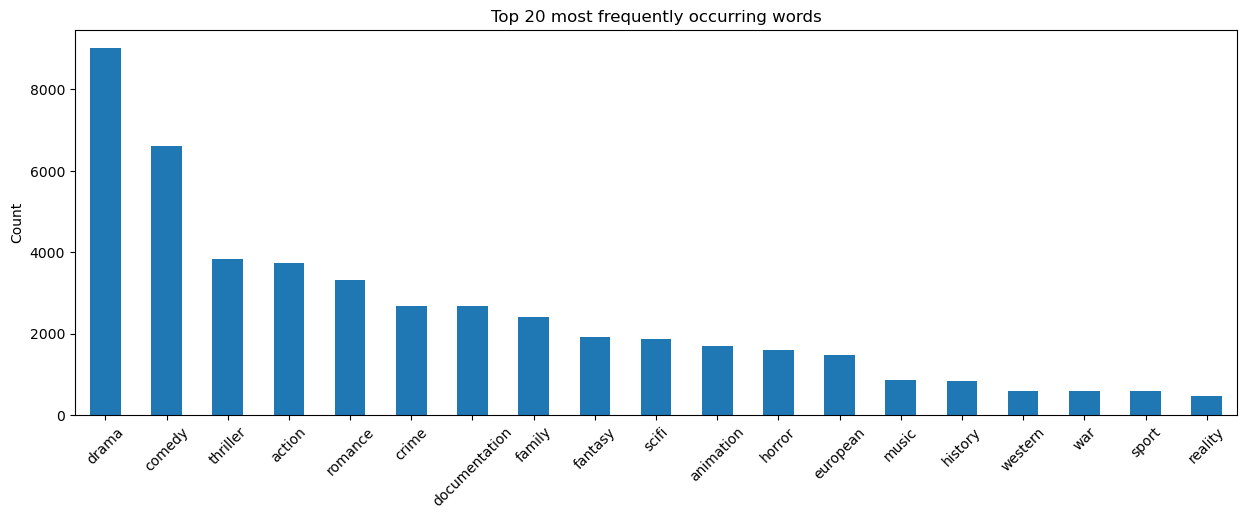

In [124]:
word_counts = pd.DataFrame(
    {"counts": genres_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [125]:
word_counts = pd.DataFrame(
    {"counts": genres_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

In [126]:
word_counts

,counts
drama,9010
comedy,6619
thriller,3835
action,3733
romance,3304
crime,2683
documentation,2670
family,2410
fantasy,1906
scifi,1855


In [189]:
all_titles_processed = all_titles.copy()

In [141]:
all_titles_processed = all_titles_processed.reset_index()

In [190]:
all_titles_processed['genres'] = genres['genres']

In [191]:
all_titles_processed.tail()

,index,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
18243,9862,tm1049635,Devineni,MOVIE,The film explores the life story of the famous...,2021,NaN,122,drama,[],NaN,tt14039792,8.4,1188.0,0.945,NaN,prime
18244,9863,tm1078263,Good Boys for Life,MOVIE,"Toddrick Frank, a hustler, living his life unt...",2021,NaN,73,"comedy, drama",['US'],NaN,tt15000128,3.9,50.0,2.076,NaN,prime
18245,9864,tm822572,Gun and a Hotel Bible,MOVIE,"Based on the original play, Gun and a Hotel Bi...",2021,NaN,58,drama,[],NaN,tt10661500,4.0,142.0,0.954,6.5,prime
18246,9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,drama,['US'],NaN,tt7672388,5.3,20.0,1.406,NaN,prime
18247,9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"family, drama",[],NaN,tt14331982,8.4,49.0,0.645,NaN,prime


In [152]:
all_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 18248 non-null  int64  
 1   id                    18248 non-null  object 
 2   title                 18248 non-null  object 
 3   type                  18248 non-null  object 
 4   description           18208 non-null  object 
 5   release_year          18248 non-null  int64  
 6   age_certification     9144 non-null   object 
 7   runtime               18248 non-null  int64  
 8   genres                18248 non-null  object 
 9   production_countries  18248 non-null  object 
 10  seasons               4155 non-null   float64
 11  imdb_id               18248 non-null  object 
 12  imdb_score            18248 non-null  float64
 13  imdb_votes            18208 non-null  float64
 14  tmdb_popularity       17816 non-null  float64
 15  tmdb_score         

In [192]:
#all_titles_processed['genres'] = all_titles_processed['genres'].astype(list)

all_titles_processed['genres'] = all_titles_processed['genres'].str.split(',')

genres_encoded = pd.get_dummies(all_titles_processed['genres'].apply(pd.Series).stack()).sum(level=0)

genres_encoded


/var/folders/rc/5snd6r290r114krvxnyr5c2m0000gn/T/ipykernel_2855/888974401.py:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genres_encoded = pd.get_dummies(all_titles_processed['genres'].apply(pd.Series).stack()).sum(level=0)


,,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
18244,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
18245,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
18246,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [193]:
all_titles_processed = pd.concat([all_titles_processed, genres_encoded], axis=1)

In [196]:
pd.set_option('display.max_columns', None)

In [197]:
all_titles_processed[0:5]

,index,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform,,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,netflix,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"[drama, action, thriller, european]",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,netflix,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"[fantasy, action, comedy]",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,netflix,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"[war, action]","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,netflix,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"[comedy, european]",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306,netflix,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [198]:
all_titles_processed.to_csv('data/all_titles_with_genres_encoded.csv')

In [92]:
all_titles_processed['genres'].describe()

count         20550
unique         4098
top       ['drama']
freq           1441
Name: genres, dtype: object

In [93]:
all_titles_processed

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,netflix
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,netflix
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,netflix
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,netflix
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN,prime
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN,prime
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN,prime
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN,prime


In [94]:
all_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,netflix
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,netflix
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,netflix
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,netflix
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN,prime
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN,prime
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN,prime
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN,prime


In [95]:
all_titles.duplicated().sum()

3

In [96]:
#all_titles[].apply(lambda x: fun(x))

#len()>1
#split()'

In [97]:
all_credits.duplicated().sum()

0

In [98]:
all_credits[all_credits.duplicated() == True]

,person_id,id,name,character,role,rank


In [99]:
#This basically shows how many titles have been duplicared. This is because one title can be on multiple platforms - and 221 titles are:
all_credits[all_credits.duplicated() == True]['id'].nunique()

0

In [100]:
#Like this example below
all_titles[all_titles['id'] == 'tm855340']

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
5548,tm855340,Thalaivii,MOVIE,The biopic charts the life of actor-turned-chi...,2021,G,153,['drama'],['IN'],NaN,tt10152736,5.9,30621.0,2.301,5.0,netflix
9476,tm855340,Thalaivii,MOVIE,The biopic charts the life of actor-turned-chi...,2021,G,153,['drama'],['IN'],NaN,tt10152736,5.9,30439.0,5.557,5.8,prime


In [101]:
all_titles[all_titles['id'] == 'tm855340']

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
5548,tm855340,Thalaivii,MOVIE,The biopic charts the life of actor-turned-chi...,2021,G,153,['drama'],['IN'],NaN,tt10152736,5.9,30621.0,2.301,5.0,netflix
9476,tm855340,Thalaivii,MOVIE,The biopic charts the life of actor-turned-chi...,2021,G,153,['drama'],['IN'],NaN,tt10152736,5.9,30439.0,5.557,5.8,prime


In [102]:
#Dropping duplicates due to same title on multiple platforms

all_titles.drop_duplicates(subset=all_titles.columns.difference(['platform']), inplace=True)

#df.drop_duplicates(subset=df.columns.difference(['Description']))

In [103]:
all_credits.duplicated().sum()

0

In [104]:
all_credits.drop_duplicates()

,person_id,id,name,character,role,rank
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,1
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR,2
2,7064,tm84618,Albert Brooks,Tom,ACTOR,3
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,4
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR,5
...,...,...,...,...,...,...
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR,1
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR,2
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR,3
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR,4


In [105]:
all_credits.duplicated().sum()

0

In [106]:
all_credits.drop_duplicates(inplace=True)

In [107]:
all_credits.duplicated().sum()

0

In [108]:
len(all_credits)

294841

In [109]:
all_credits.head()

,person_id,id,name,character,role,rank
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,1
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR,2
2,7064,tm84618,Albert Brooks,Tom,ACTOR,3
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,4
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR,5


In [110]:
import matplotlib.pyplot as plt

NameError: name 'streaming' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
streaming.head()

In [ ]:
all_titles.head()

In [ ]:
all_titles.to_csv('data/all_titles.csv')

In [ ]:
#Dropping the rows with null values for imdb score and votes

#all_titles.dropna(subset=['imdb_score', 'imdb_votes'], how='all', inplace=True)

#all_titles[all_titles['imdb_score'].isnull() & all_titles['imdb_votes'].isnull()])
#mosquito_cleaner = mosquito.drop((mosquito[(mosquito.duplicated() == True) & (mosquito['Mosquito number'] != 50)]).index)

In [ ]:
streaming.to_csv('data/streaming.csv')